<a href="https://colab.research.google.com/github/laurence-lin/Coursera_Capstone/blob/master/Final_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

import os
import math
import gc

import pandas as pd
import numpy as np

from google.colab import files
import folium

print('Library imported.')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Library imported.


In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

In [ ]:
files.upload()
df_ny_data = pd.read_csv('df_ny_feature.csv', index_col = None)
print(df_ny_data.head())


Saving df_ny_feature.csv to df_ny_feature.csv
       name_x  latitude  longitude                  venue_id         city  \
0  McDonald's   40.7578   -73.9854  5cf87778b399f7002cf1071a     New York   
1  McDonald's   40.7266   -74.0386  4bf5553ecad2c928a9e49c99  Jersey City   
2  McDonald's   40.7609   -73.9673  4f7f4df2754a7bf483d814c8     New York   
3  McDonald's   40.7609   -73.9673  52e9a22e498e55622108b7d9     New York   
4  McDonald's   40.7595   -73.9183  4b304c35f964a520b8f824e3      Astoria   

   ratings  comments  Density  neighbor_entropy  competitiveness  \
0      3.3       318     41.0          2.466631        -0.268293   
1      3.7       622     43.0          3.150678        -0.186047   
2      3.8      1644     26.0          2.971377        -0.230769   
3      3.8      1644     26.0          2.971377        -0.230769   
4      3.9       652     15.0          2.488328        -0.200000   

   other_food_neighbor  food_neighbor_rate  residence_venue  
0                   

In [ ]:
drop_feature = ['name_x', 'latitude', 'longitude', 'venue_id']
df_ny_data.drop(drop_feature, axis = 1, inplace = True)
print(df_ny_data.head())

          city  ratings  comments  Density  neighbor_entropy  competitiveness  \
0     New York      3.3       318     41.0          2.466631        -0.268293   
1  Jersey City      3.7       622     43.0          3.150678        -0.186047   
2     New York      3.8      1644     26.0          2.971377        -0.230769   
3     New York      3.8      1644     26.0          2.971377        -0.230769   
4      Astoria      3.9       652     15.0          2.488328        -0.200000   

   other_food_neighbor  food_neighbor_rate  residence_venue  
0                   25            0.609756                3  
1                   29            0.674419                2  
2                   20            0.769231                5  
3                   20            0.769231                5  
4                    8            0.533333                5  


###Observe linear relationship between individual features and number of comments

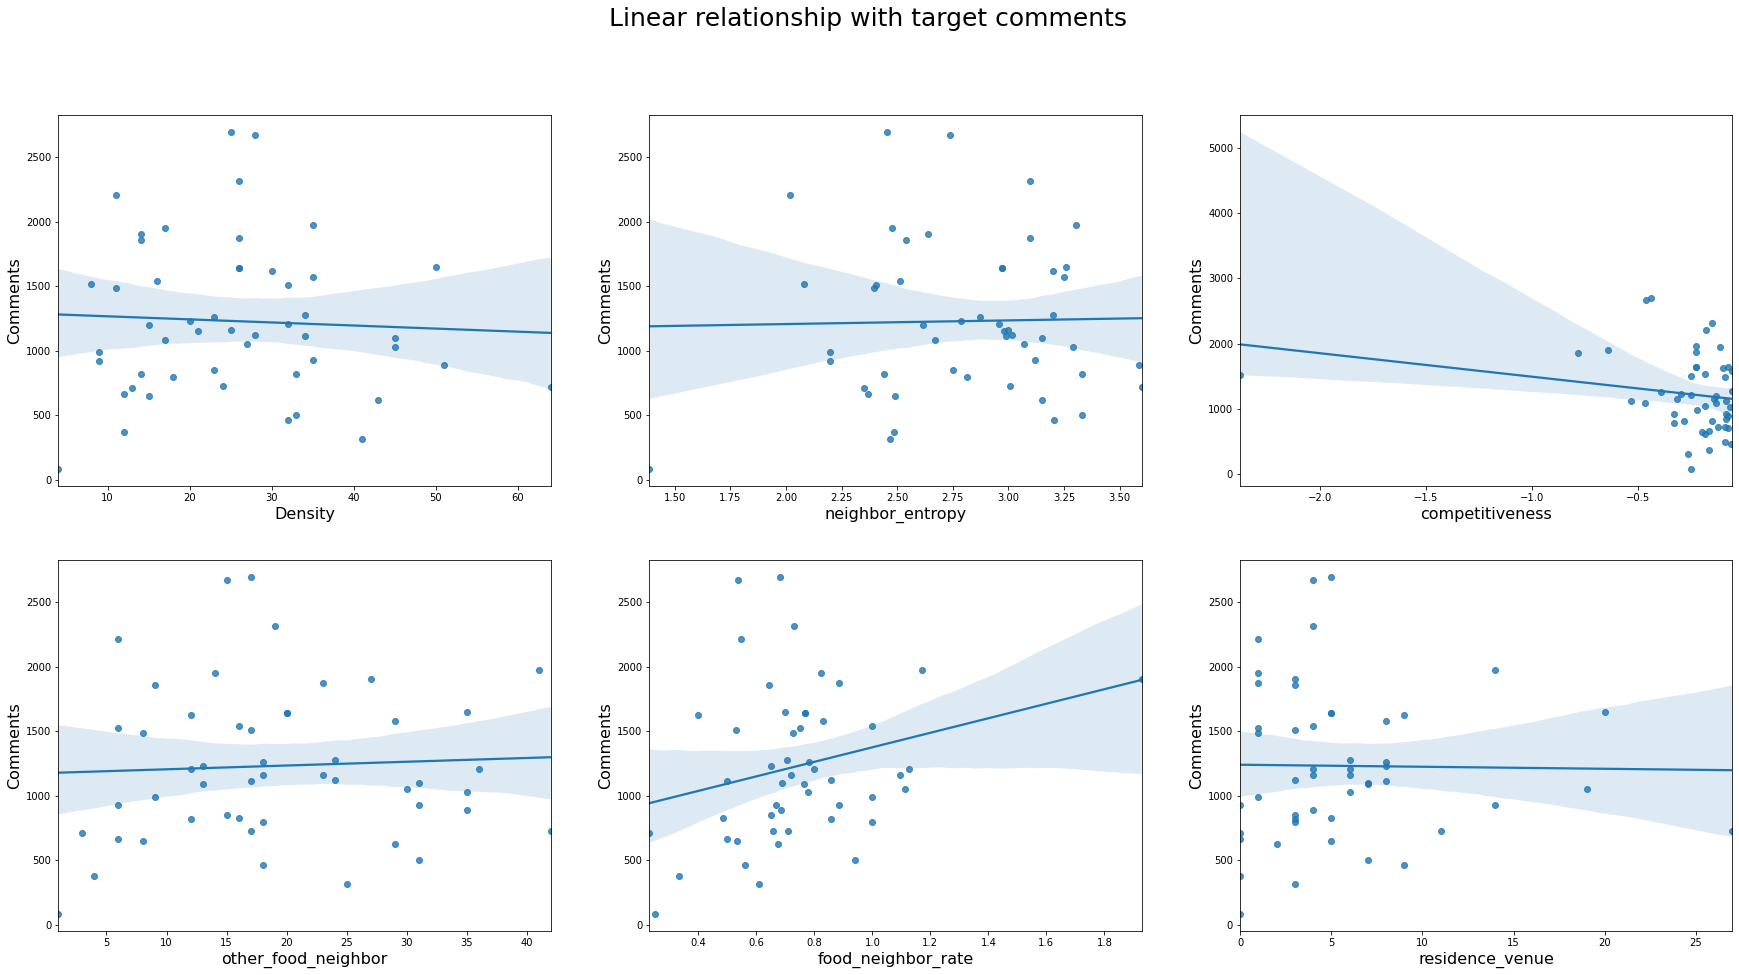

In [ ]:
features = ['Density', 'neighbor_entropy', 'competitiveness', 'other_food_neighbor', 'food_neighbor_rate', 'residence_venue']

fig = plt.figure(figsize = (30, 15))
fig.suptitle('Linear relationship with target comments', fontsize = 25)

for i in range(len(features)):
  ax = fig.add_subplot(2, 3, i + 1)
  sns.regplot(df_ny_data[features[i]], df_ny_data['comments'], ax = ax)
  ax.set_xlabel(features[i], fontsize = 16)
  ax.set_ylabel('Comments', fontsize = 16)
    

###Observe relationship btw individual features and ratings

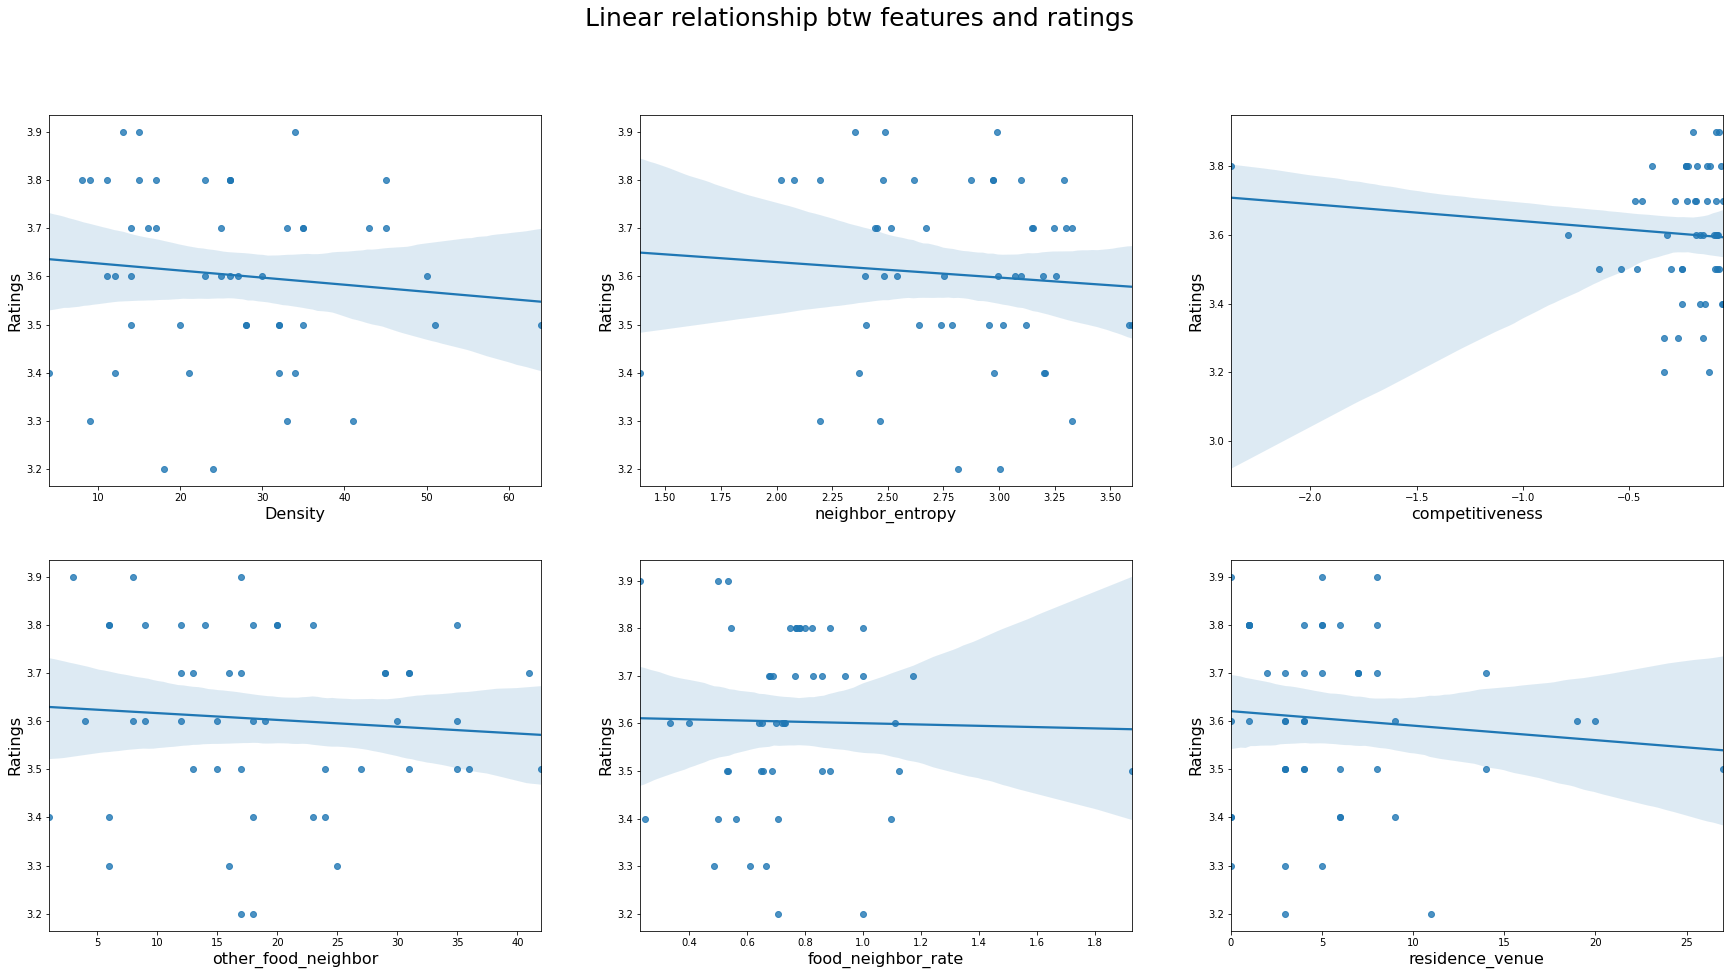

In [ ]:
fig = plt.figure(figsize = (30, 15))
fig.suptitle('Linear relationship btw features and ratings', fontsize = 25)

for i in range(len(features)):
  ax = fig.add_subplot(2, 3, i + 1)
  sns.regplot(df_ny_data[features[i]], df_ny_data['ratings'], ax = ax)
  ax.set_xlabel(features[i], fontsize = 16)
  ax.set_ylabel('Ratings', fontsize = 16)

In [ ]:
#Try to remove outliers from comments and ratings
# drop comment outliers > 4000
df_ny_data = df_ny_data[df_ny_data['comments'] < 4000]

#Drop ratings outliers < 3.1
df_ny_data = df_ny_data[df_ny_data['ratings'] > 3.1]


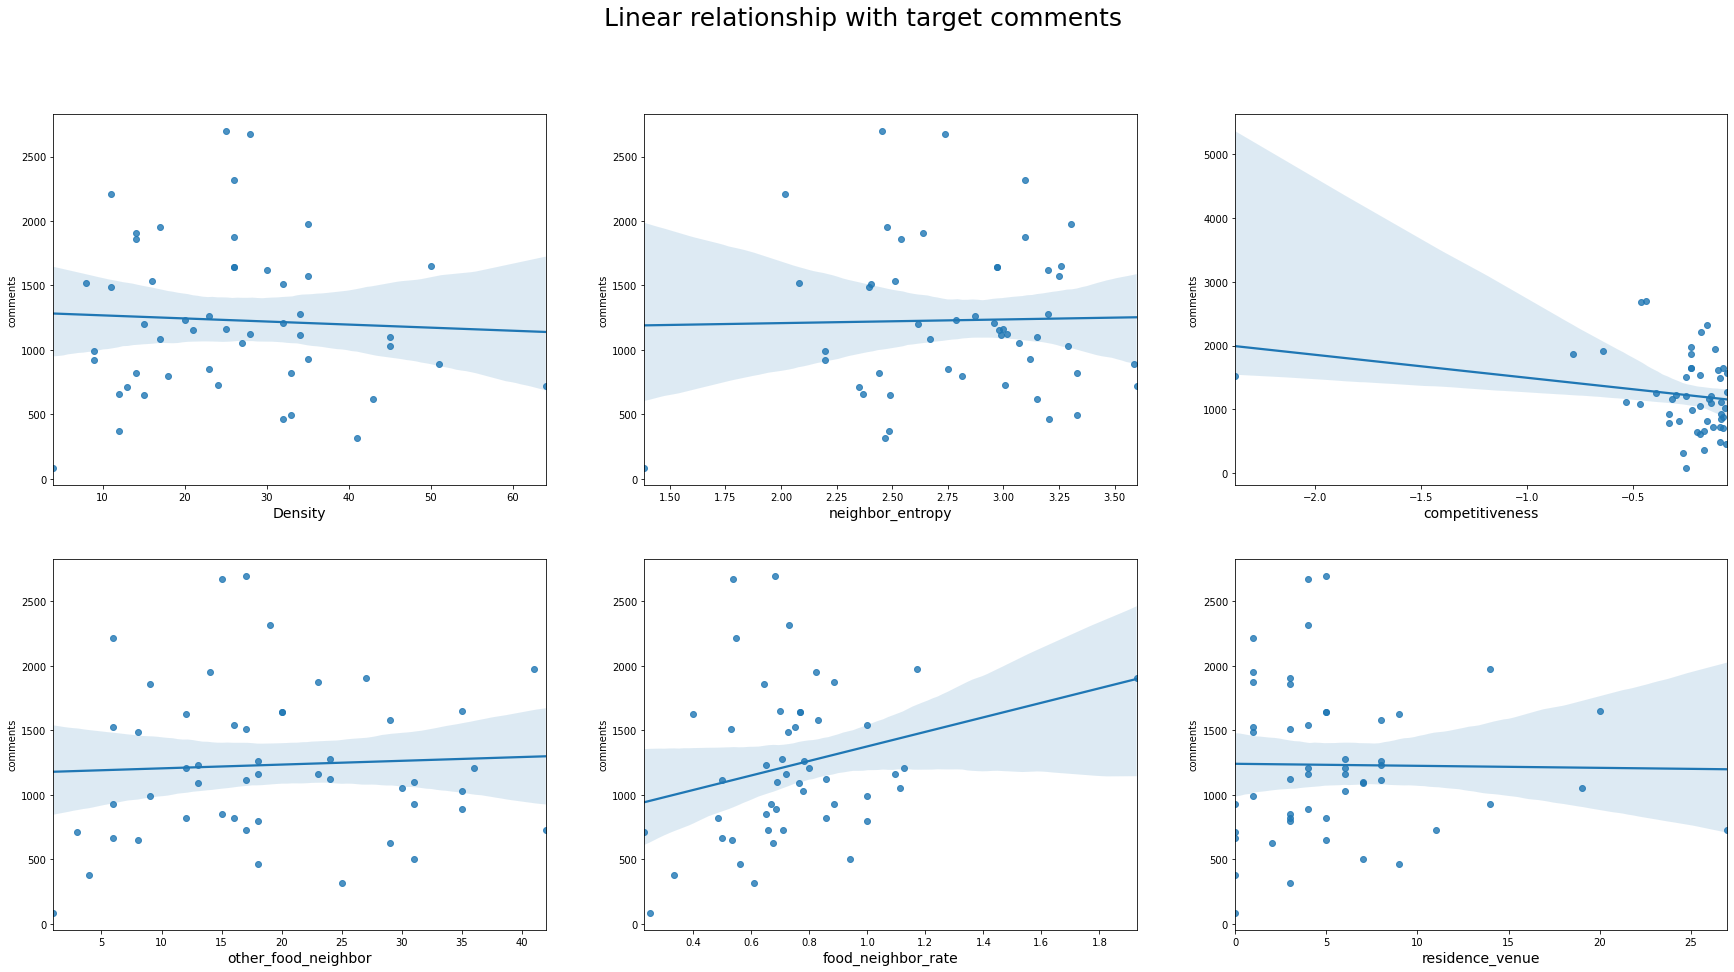

In [ ]:
features = ['Density', 'neighbor_entropy', 'competitiveness', 'other_food_neighbor', 'food_neighbor_rate', 'residence_venue']

fig = plt.figure(figsize = (30, 15))
fig.suptitle('Linear relationship with target comments', fontsize = 25)

for i in range(len(features)):
  ax = fig.add_subplot(2, 3, i + 1)
  sns.regplot(df_ny_data[features[i]], df_ny_data['comments'], ax = ax)
  ax.set_xlabel(features[i], fontsize = 14)
    

In [ ]:
# The linear relationship btw target is not obvious.
df_ny_data.head()

,city,ratings,comments,Density,neighbor_entropy,competitiveness,other_food_neighbor,food_neighbor_rate,residence_venue
0,New York,3.3,318,41.0,2.466631,-0.268293,25,0.609756,3
1,Jersey City,3.7,622,43.0,3.150678,-0.186047,29,0.674419,2
2,New York,3.8,1644,26.0,2.971377,-0.230769,20,0.769231,5
3,New York,3.8,1644,26.0,2.971377,-0.230769,20,0.769231,5
4,Astoria,3.9,652,15.0,2.488328,-0.200000,8,0.533333,5


In [ ]:
df_ny_data.head()


,city,ratings,comments,Density,neighbor_entropy,competitiveness,other_food_neighbor,food_neighbor_rate,residence_venue
0,New York,3.3,318,41.0,2.466631,-0.268293,25,0.609756,3
1,Jersey City,3.7,622,43.0,3.150678,-0.186047,29,0.674419,2
2,New York,3.8,1644,26.0,2.971377,-0.230769,20,0.769231,5
3,New York,3.8,1644,26.0,2.971377,-0.230769,20,0.769231,5
4,Astoria,3.9,652,15.0,2.488328,-0.200000,8,0.533333,5


Text(0, 0.5, 'Density')

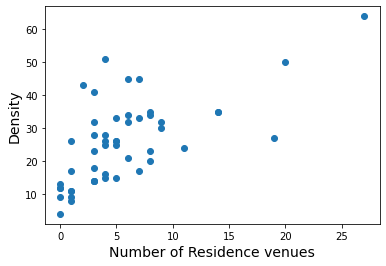

In [ ]:
#Observe the relationship between venue features
plt.figure()
plt.scatter(x = 'residence_venue', y = 'Density', data = df_ny_data)
plt.xlabel('Number of Residence venues', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

###I assume that more residence venues indicates more residents in the area, thus attracts more venue surrounding.

Text(0, 0.5, 'Food venues around')

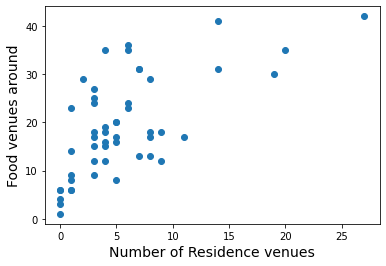

In [ ]:
plt.figure()
plt.scatter(x = 'residence_venue', y = 'other_food_neighbor', data = df_ny_data)
plt.xlabel('Number of Residence venues', fontsize = 14)
plt.ylabel('Food venues around', fontsize = 14)

###Same observing the plot, the more residents may attracts more food restaurants venue. These two feautres have positive linear relationship

Text(0, 0.5, 'Number of comments')

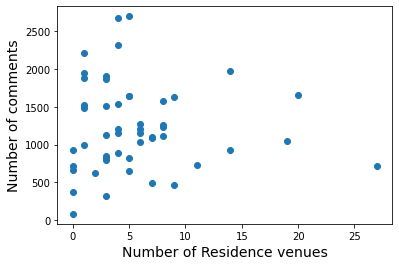

In [ ]:
plt.figure()
plt.scatter(x = 'residence_venue', y = 'comments', data = df_ny_data)
plt.xlabel('Number of Residence venues', fontsize = 14)
plt.ylabel('Number of comments', fontsize = 14)

###However the result shown by Mcdonald's restaurant store shows different relationship, residents popularity seems not clearly related to number of comments. 

###But I could see that where less residents, more Mcdonald's store is located. Seems that these fast food restaurants prefers not open near the residence area.

In [ ]:
df_ny_data['total_compet_rate'] = df_ny_data['food_neighbor_rate'] - df_ny_data['competitiveness']
print(df_ny_data.head())

          city  ratings  comments  Density  neighbor_entropy  competitiveness  \
0     New York      3.3       318     41.0          2.466631        -0.268293   
1  Jersey City      3.7       622     43.0          3.150678        -0.186047   
2     New York      3.8      1644     26.0          2.971377        -0.230769   
3     New York      3.8      1644     26.0          2.971377        -0.230769   
4      Astoria      3.9       652     15.0          2.488328        -0.200000   

   other_food_neighbor  food_neighbor_rate  residence_venue  total_compet_rate  
0                   25            0.609756                3           0.878049  
1                   29            0.674419                2           0.860465  
2                   20            0.769231                5           1.000000  
3                   20            0.769231                5           1.000000  
4                    8            0.533333                5           0.733333  


In [ ]:
df_ny_data.isnull().sum()

city                   0
ratings                0
comments               0
Density                0
neighbor_entropy       0
competitiveness        0
other_food_neighbor    0
food_neighbor_rate     0
residence_venue        0
total_compet_rate      0
dtype: int64

Text(0, 0.5, 'Neighbor Entropy')

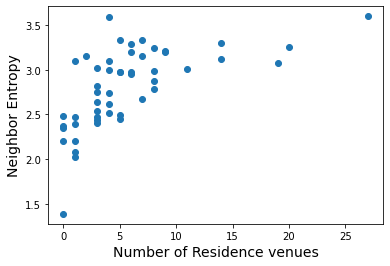

In [ ]:
plt.figure()
plt.scatter(x = 'residence_venue', y = 'neighbor_entropy', data = df_ny_data)
plt.xlabel('Number of Residence venues', fontsize = 14)
plt.ylabel('Neighbor Entropy', fontsize = 14)

In [ ]:
df_ny_data.head()

,name_x,latitude,longitude,venue_id,city,ratings,comments,Density,neighbor_entropy,competitiveness,other_food_neighbor,food_neighbor_rate,residence_venue
0,McDonald's,40.7578,-73.9854,5cf87778b399f7002cf1071a,New York,3.3,318,41.0,2.466631,-0.268293,25,0.609756,3
1,McDonald's,40.7266,-74.0386,4bf5553ecad2c928a9e49c99,Jersey City,3.7,622,43.0,3.150678,-0.186047,29,0.674419,2
2,McDonald's,40.7609,-73.9673,4f7f4df2754a7bf483d814c8,New York,3.8,1644,26.0,2.971377,-0.230769,20,0.769231,5
3,McDonald's,40.7609,-73.9673,52e9a22e498e55622108b7d9,New York,3.8,1644,26.0,2.971377,-0.230769,20,0.769231,5
4,McDonald's,40.7595,-73.9183,4b304c35f964a520b8f824e3,Astoria,3.9,652,15.0,2.488328,-0.200000,8,0.533333,5


###Define ranking performance metric

In [ ]:
# define ranking metrics

# NDCG top-k ranking = DCG / IDCG
#DCG: set predicted rank output list = y_predict(ranked by prediction score)
#y_predict: pair of [item, predicted score]

def comput_rank(score_true, score_predict):
    # score_true: list or dataframe containing real scores
    # score_predict: list or dataframe containing predict scores
    # return: Ranked list of items based on true score and predict score
    y_true = pd.DataFrame({'true_score':list(score_true)})
    y_true_rk = y_true.sort_values(by = 'true_score', ascending = False)
    y_true_rk =list(y_true_rk.index.values) # items rank by real score

    y_true['predict_score'] = score_predict
    y_pred_rk = y_true.sort_values(by = 'predict_score', ascending = False)
    y_pred_rk = list(y_pred_rk.index.values)

    gc.collect()

    return y_true_rk, y_pred_rk
    
def NDCG_k(y_true, y_pred, k):
    # Compute NDCG for first K ranked items
    # y_true: Real ranked item list
    # y_pred: Predicted ranked itme list
    DCG = 0
    IDCG = 0
    L = len(y_true)
    # DCG & IDCG
    for i in range(1, k + 1):
      try:
        rank_i = y_true.index(y_pred[i-1]) + 1
        rel_i = (L - rank_i + 1)/L
        DCG += (2**(rel_i) - 1) / np.log2(i + 1)

        rel_i_ideal = (L - i + 1)/L
        IDCG += (2**(rel_i_ideal) - 1) / np.log2(i + 1)
      except:
        print(y_true)
        print(y_pred[i-1])
    
    NDCG = DCG / IDCG

    return NDCG



In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

print('Candidate models loaded.')

#Test the efficiency of each feature, assess the performance
# Define metrics
from scipy.stats import rankdata
import random
from numpy.random import permutation

columns = ['Density', 'neighbor_entropy', 'competitiveness', 'other_food_neighbor', 'food_neighbor_rate', 'residence_venue', 'comments']
df = df_ny_data[columns]
df_y = df['comments']
df_x = df.loc[:, df.columns != 'comments']

Candidate models loaded.


In [ ]:

df_x_ = scaler.fit_transform(df_x)
df_y_ = scaler.fit_transform(df_y.values.reshape(-1, 1))


In [ ]:


# Search for best parameters
#cv = GridSearchCV()

lr = LinearRegression()
test_size = int(df.shape[0]*0.33)
mean_score = 0
mean_rand_score = 0
iterations = 1000

scaler = StandardScaler()

df_x_ = scaler.fit_transform(df_x['Density'].values.reshape(-1, 1))
df_y_ = scaler.fit_transform(df_y.values.reshape(-1, 1))

for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(df_x_, df_y_, test_size = test_size)

    lr.fit(x_train, y_train)
    predict_score = lr.predict(x_test)
    
    y_true, y_pred = comput_rank(y_test, predict_score)

    score = NDCG_k(y_true, y_pred, 7)
    mean_score += score
    # compute random sort score for comparison
    random_sort = list(permutation(y_test))
    random_score = NDCG_k(list(y_test), random_sort, 10)
    mean_rand_score += random_score
    
mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)




Mean score =  0.4255573163313682
Random rank score =  0.6337545182600525


In [ ]:

regressor = DecisionTreeRegressor(max_depth = 50)

mean_score = 0
mean_rand_score = 0

df_x_ = df_x['Density'].values.reshape(-1, 1)
df_y_ = df_y.values.reshape(-1, 1)

for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(df_x_, df_y_, test_size = test_size)

    regressor.fit(x_train, y_train)
    predict_score = regressor.predict(x_test)
    
    y_true, y_pred = comput_rank(y_test, predict_score)

    score = NDCG_k(y_true, y_pred, 7)
    mean_score += score
    # compute random sort score for comparison
    random_sort = list(permutation(y_test))
    random_score = NDCG_k(list(y_test), random_sort, 10)
    mean_rand_score += random_score
    
mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)

Mean score =  0.6044846725225509
Random rank score =  0.6266376711175272


In [ ]:
nn = MLPRegressor(hidden_layer_sizes=50,
                  max_iter = iterations,
                  alpha = 0.001)

mean_score = 0
mean_rand_score = 0

for iterate in range(iterations):
    x_train, x_test, y_train, y_test = train_test_split(df_x_, df_y_, test_size = test_size)

    nn.fit(x_train, y_train)
    predict_score = nn.predict(x_test)
    
    y_true, y_pred = comput_rank([y_test], [predict_score])

    score = NDCG_k(y_true, y_pred, 7)
    mean_score += score
    # compute random sort score for comparison
    random_sort = list(permutation(y_test))
    random_score = NDCG_k(y_test.tolist(), random_sort, 7)
    mean_rand_score += random_score
    
mean_score = mean_score / iterations
mean_rand_score = mean_rand_score/ iterations
print('Mean score = ', mean_score)
print('Random rank score = ', mean_rand_score)



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]


IndexError: ignored